In [1]:
print("I am inside my project folder")


I am inside my project folder


In [2]:
import pandas as pd
import glob


In [3]:
glob.glob("data/api_data_aadhar_demographic_*.csv")


['data\\api_data_aadhar_demographic_0_500000.csv',
 'data\\api_data_aadhar_demographic_1000000_1500000.csv',
 'data\\api_data_aadhar_demographic_1500000_2000000.csv',
 'data\\api_data_aadhar_demographic_2000000_2071700.csv',
 'data\\api_data_aadhar_demographic_500000_1000000.csv']

In [4]:
files = glob.glob("data/api_data_aadhar_demographic_*.csv")

df = pd.concat(
    (pd.read_csv(f) for f in files),
    ignore_index=True
)

print("Total rows after merge:", len(df))


Total rows after merge: 2071700


In [5]:
df.to_excel("demographic_final.xlsx", index=False)
print("demographic_final.xlsx created successfully")


ValueError: This sheet is too large! Your sheet size is: 2071700, 6 Max sheet size is: 1048576, 16384

In [6]:
df.to_csv("demographic_final.csv", index=False)
print("demographic_final.csv created successfully")


demographic_final.csv created successfully


In [7]:
import pandas as pd
import glob

bio_files = glob.glob("data/api_data_aadhar_biometric_*.csv")
print(bio_files)


['data\\api_data_aadhar_biometric_0_500000.csv', 'data\\api_data_aadhar_biometric_1000000_1500000.csv', 'data\\api_data_aadhar_biometric_1500000_1861108.csv', 'data\\api_data_aadhar_biometric_500000_1000000.csv']


In [8]:
import glob

glob.glob("data/api_data_aadhar_biometric_*.csv")


['data\\api_data_aadhar_biometric_0_500000.csv',
 'data\\api_data_aadhar_biometric_1000000_1500000.csv',
 'data\\api_data_aadhar_biometric_1500000_1861108.csv',
 'data\\api_data_aadhar_biometric_500000_1000000.csv']

In [9]:
bio_df = pd.concat(
    (pd.read_csv(f) for f in bio_files),
    ignore_index=True
)

print("Total biometric rows:", len(bio_df))


Total biometric rows: 1861108


In [10]:
bio_df.to_csv("biometric_final.csv", index=False)
print("biometric_final.csv created successfully")


biometric_final.csv created successfully


In [11]:
bio_state = bio_df.groupby("state")["failure"].sum().reset_index()
bio_state.head()



KeyError: 'Column not found: failure'

In [12]:
bio_df.columns


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [13]:
# create a total biometric stress column
bio_df["biometric_stress"] = bio_df["bio_age_5_17"] + bio_df["bio_age_17_"]

bio_df[["state", "biometric_stress"]].head()


,state,biometric_stress
0,Haryana,857
1,Bihar,513
2,Jammu and Kashmir,1734
3,Bihar,1236
4,Tamil Nadu,1086


In [14]:
bio_state = (
    bio_df
    .groupby("state")["biometric_stress"]
    .sum()
    .reset_index()
)

bio_state.head()


,state,biometric_stress
0,Andaman & Nicobar Islands,2384
1,Andaman and Nicobar Islands,18314
2,Andhra Pradesh,3714592
3,Arunachal Pradesh,72394
4,Assam,982722


In [15]:
bio_state.to_excel("state_biometric_stress.xlsx", index=False)
print("state_biometric_stress.xlsx created successfully")


state_biometric_stress.xlsx created successfully


In [16]:
import pandas as pd

demo_df = pd.read_csv("demographic_final.csv")
print("Rows in demographic data:", len(demo_df))


Rows in demographic data: 2071700


In [17]:
demo_df.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [18]:
# create total demographic update stress
demo_df["demographic_stress"] = demo_df["demo_age_5_17"] + demo_df["demo_age_17_"]

demo_df[["state", "demographic_stress"]].head()


,state,demographic_stress
0,Uttar Pradesh,578
1,Andhra Pradesh,397
2,Gujarat,830
3,Andhra Pradesh,338
4,Rajasthan,830


In [19]:
state_demo = (
    demo_df
    .groupby("state")["demographic_stress"]
    .sum()
    .reset_index()
)

state_demo.head()


,state,demographic_stress
0,100000,2
1,Andaman & Nicobar Islands,1059
2,Andaman and Nicobar Islands,6187
3,Andhra Pradesh,2295505
4,Arunachal Pradesh,36443


In [20]:
state_demo.to_excel("state_demographic_stress.xlsx", index=False)
print("state_demographic_stress.xlsx created successfully")


state_demographic_stress.xlsx created successfully


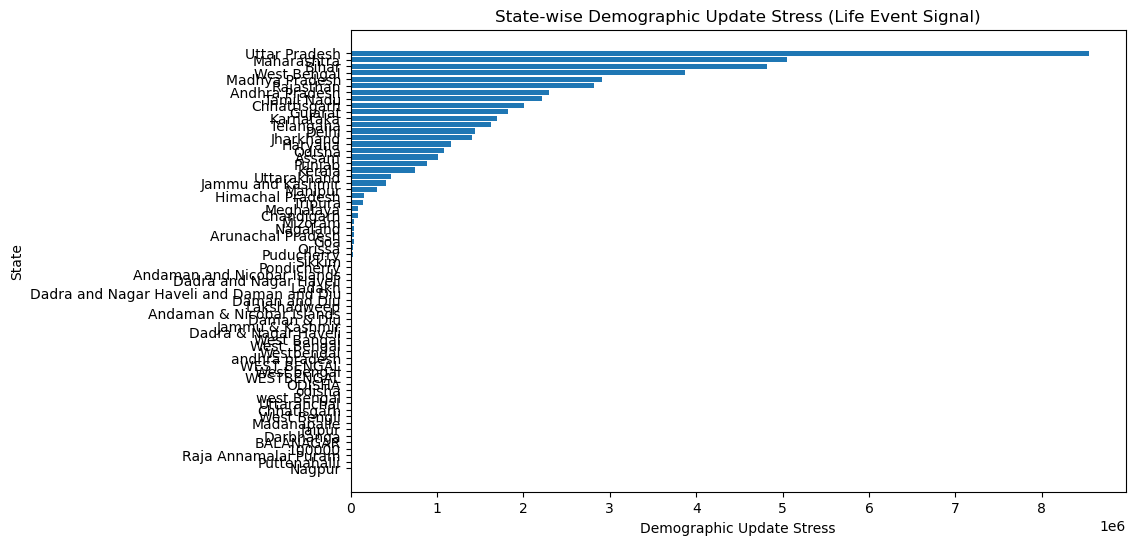

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

demo = pd.read_excel("state_demographic_stress.xlsx")
demo = demo.sort_values(by=demo.columns[1], ascending=False)

plt.figure(figsize=(10,6))
plt.barh(demo.iloc[:,0], demo.iloc[:,1])
plt.xlabel("Demographic Update Stress")
plt.ylabel("State")
plt.title("State-wise Demographic Update Stress (Life Event Signal)")
plt.gca().invert_yaxis()
plt.show()


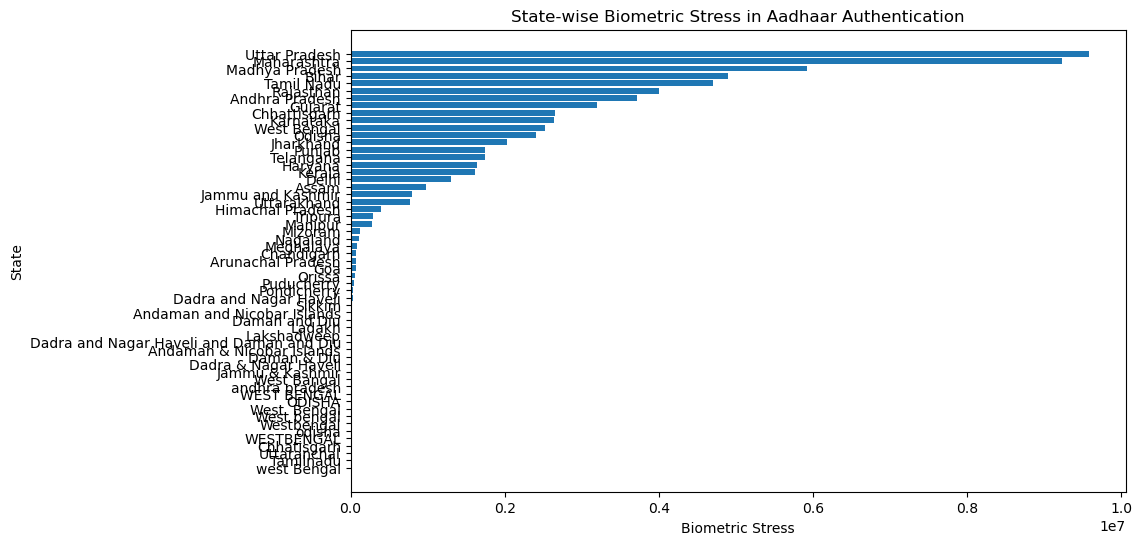

In [22]:
bio = pd.read_excel("state_biometric_stress.xlsx")
bio = bio.sort_values(by=bio.columns[1], ascending=False)

plt.figure(figsize=(10,6))
plt.barh(bio.iloc[:,0], bio.iloc[:,1])
plt.xlabel("Biometric Stress")
plt.ylabel("State")
plt.title("State-wise Biometric Stress in Aadhaar Authentication")
plt.gca().invert_yaxis()
plt.show()


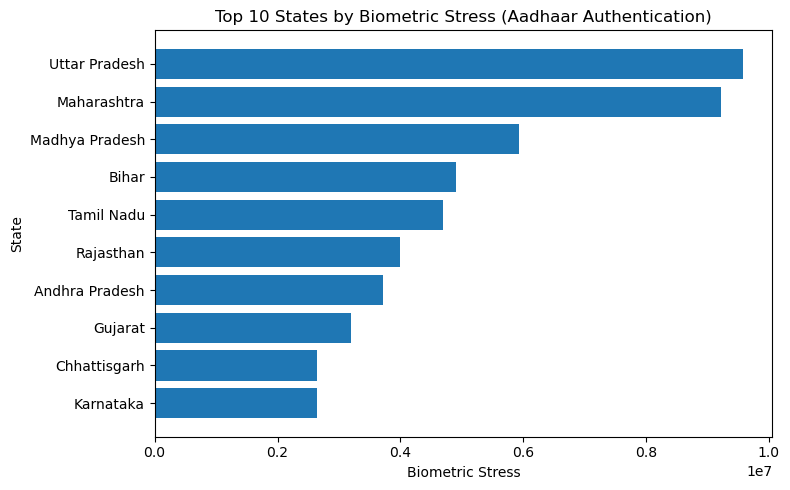

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

bio = pd.read_excel("state_biometric_stress.xlsx")
bio = bio.sort_values(by=bio.columns[1], ascending=False)

# take top 10 states only
bio_top = bio.head(10)

plt.figure(figsize=(8,5))
plt.barh(bio_top.iloc[:,0], bio_top.iloc[:,1])
plt.xlabel("Biometric Stress")
plt.ylabel("State")
plt.title("Top 10 States by Biometric Stress (Aadhaar Authentication)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


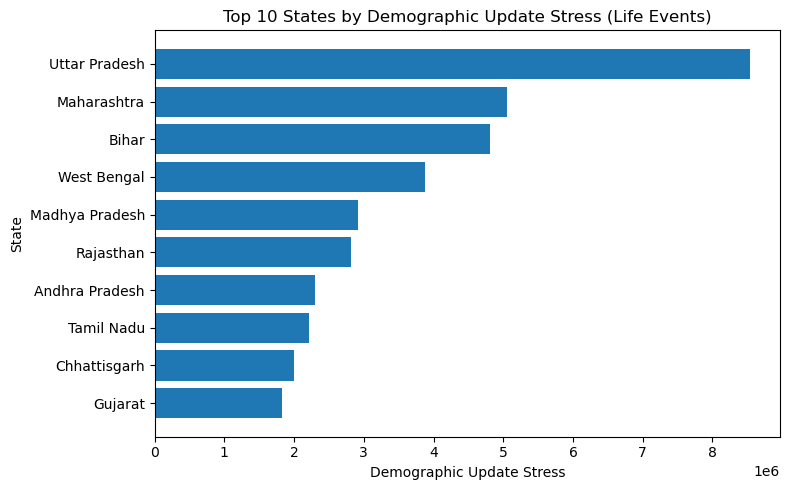

In [24]:
demo = pd.read_excel("state_demographic_stress.xlsx")
demo = demo.sort_values(by=demo.columns[1], ascending=False)

# take top 10 states only
demo_top = demo.head(10)

plt.figure(figsize=(8,5))
plt.barh(demo_top.iloc[:,0], demo_top.iloc[:,1])
plt.xlabel("Demographic Update Stress")
plt.ylabel("State")
plt.title("Top 10 States by Demographic Update Stress (Life Events)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


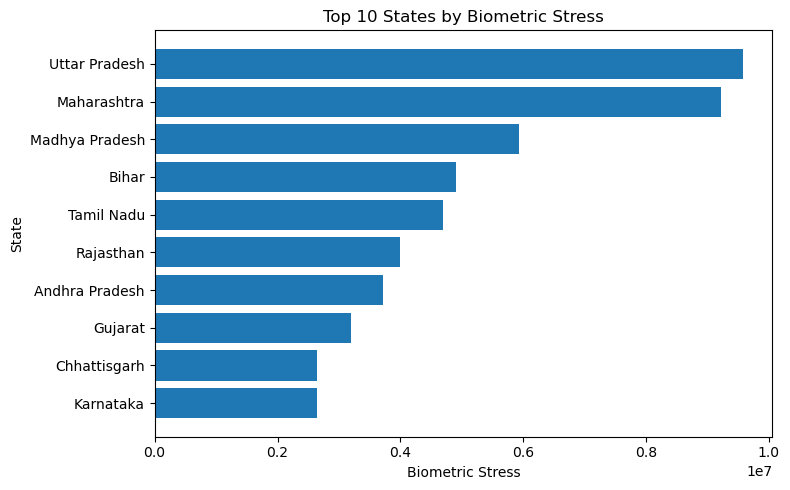

In [25]:
plt.figure(figsize=(8,5))
plt.barh(bio_top.iloc[:,0], bio_top.iloc[:,1])
plt.xlabel("Biometric Stress")
plt.ylabel("State")
plt.title("Top 10 States by Biometric Stress")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("biometric_stress_top10.png", dpi=300)
plt.show()


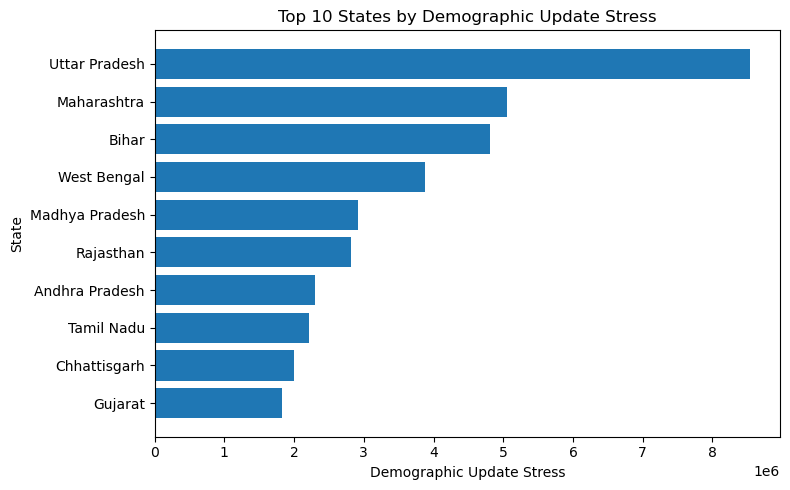

In [26]:
plt.figure(figsize=(8,5))
plt.barh(demo_top.iloc[:,0], demo_top.iloc[:,1])
plt.xlabel("Demographic Update Stress")
plt.ylabel("State")
plt.title("Top 10 States by Demographic Update Stress")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("demographic_stress_top10.png", dpi=300)
plt.show()


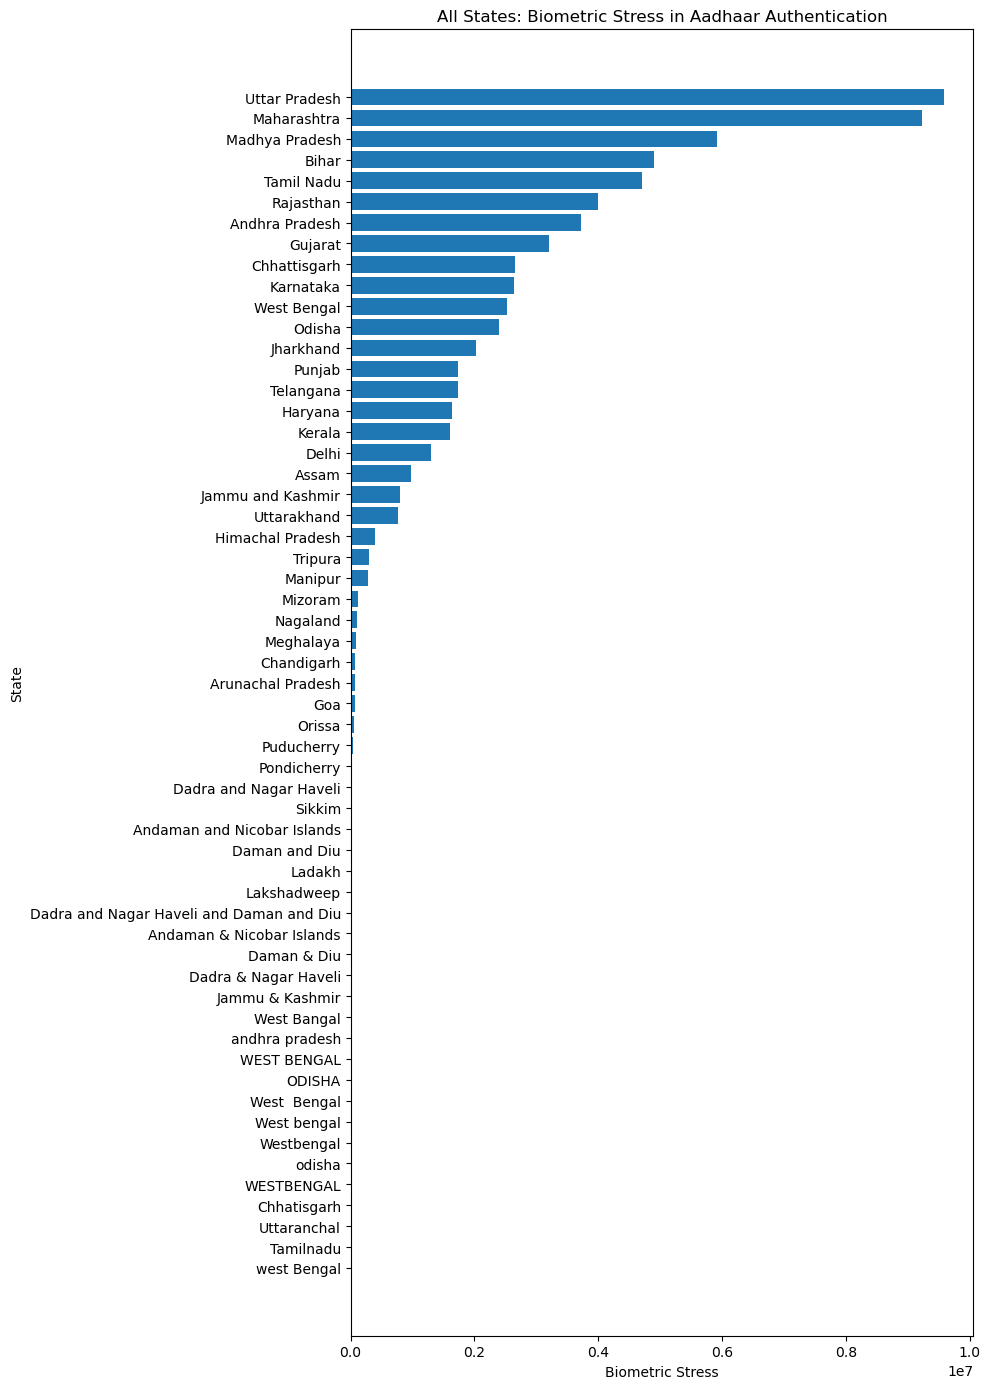

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

bio = pd.read_excel("state_biometric_stress.xlsx")
bio = bio.sort_values(by=bio.columns[1], ascending=False)

plt.figure(figsize=(10, 14))   # TALL figure
plt.barh(bio.iloc[:,0], bio.iloc[:,1])
plt.xlabel("Biometric Stress")
plt.ylabel("State")
plt.title("All States: Biometric Stress in Aadhaar Authentication")
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig("biometric_stress_all_states.png", dpi=300)
plt.show()


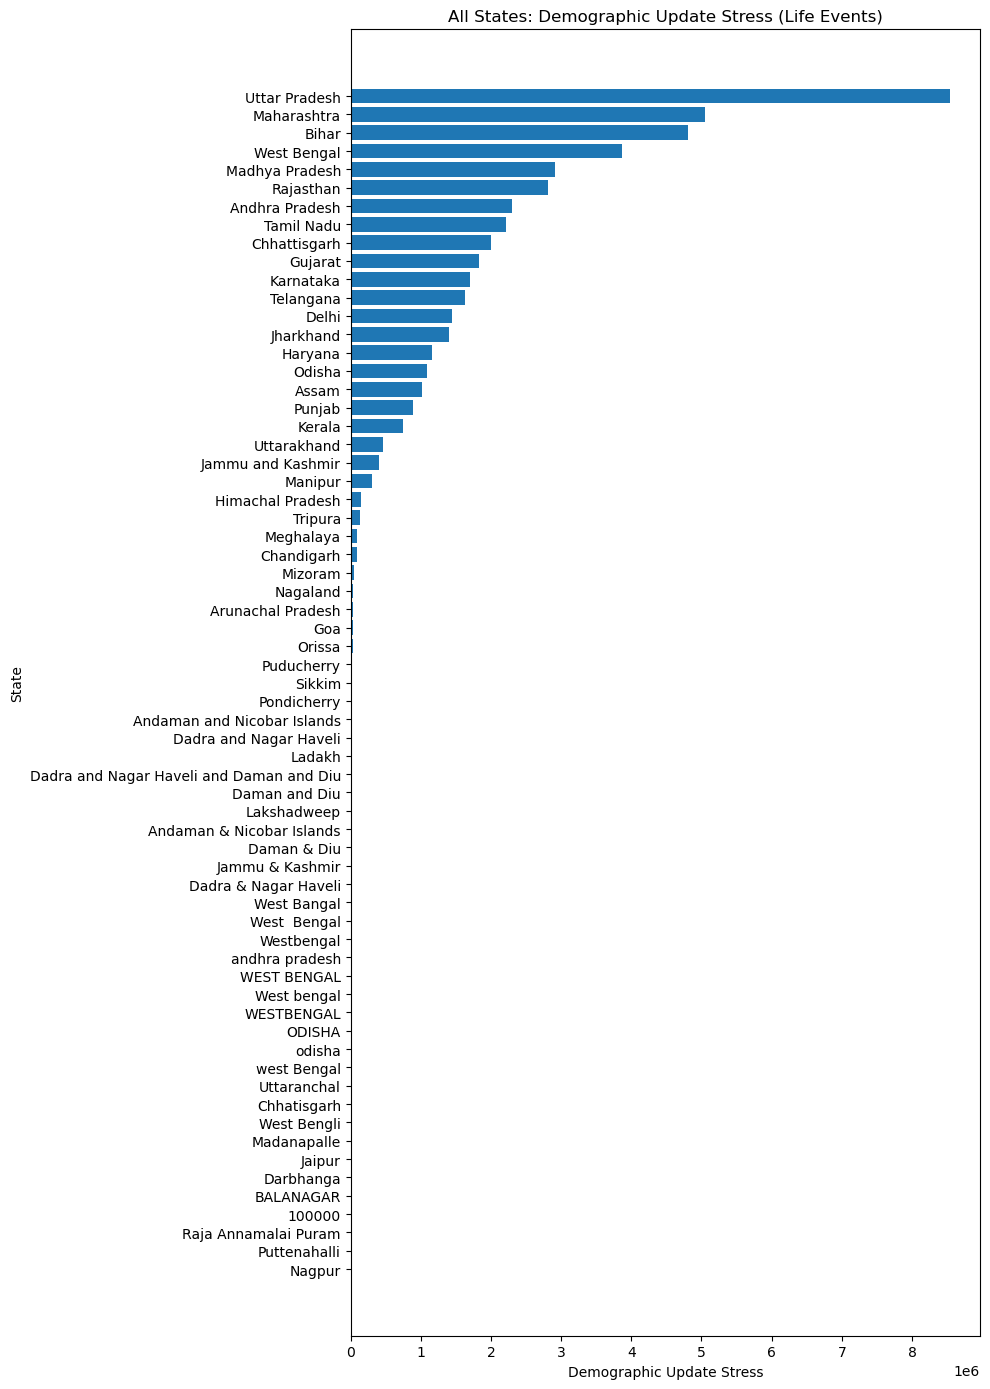

In [28]:
demo = pd.read_excel("state_demographic_stress.xlsx")
demo = demo.sort_values(by=demo.columns[1], ascending=False)

plt.figure(figsize=(10, 14))   # TALL figure
plt.barh(demo.iloc[:,0], demo.iloc[:,1])
plt.xlabel("Demographic Update Stress")
plt.ylabel("State")
plt.title("All States: Demographic Update Stress (Life Events)")
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig("demographic_stress_all_states.png", dpi=300)
plt.show()


In [29]:
# find common top states
demo_top_states = set(demo_top.iloc[:,0])
bio_top_states = set(bio_top.iloc[:,0])

common_states = demo_top_states.intersection(bio_top_states)
common_states


{'Andhra Pradesh',
 'Bihar',
 'Chhattisgarh',
 'Gujarat',
 'Madhya Pradesh',
 'Maharashtra',
 'Rajasthan',
 'Tamil Nadu',
 'Uttar Pradesh'}

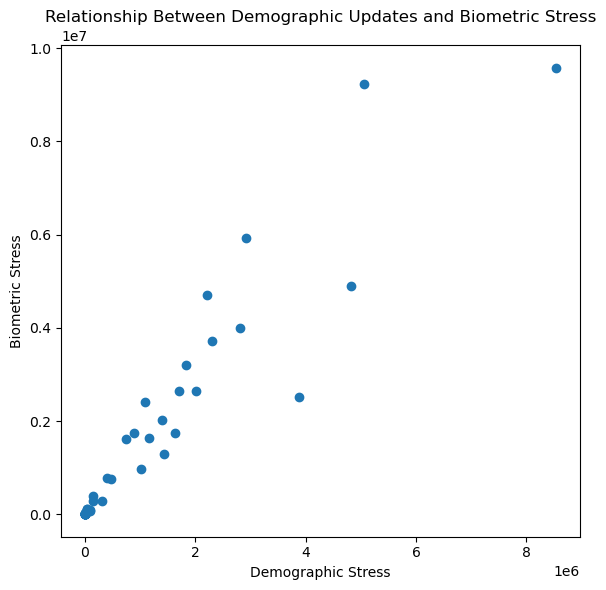

In [30]:
# merge two summaries
merged = pd.merge(
    demo,
    bio,
    on="state",
    suffixes=("_demo", "_bio")
)

plt.figure(figsize=(6,6))
plt.scatter(merged.iloc[:,1], merged.iloc[:,2])
plt.xlabel("Demographic Stress")
plt.ylabel("Biometric Stress")
plt.title("Relationship Between Demographic Updates and Biometric Stress")
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

demo = pd.read_excel("state_demographic_stress.xlsx")
bio = pd.read_excel("state_biometric_stress.xlsx")



In [32]:
# sort and take top 10 demographic states
demo_top = demo.sort_values(by=demo.columns[1], ascending=False).head(10)

# merge biometric stress for same states
compare = pd.merge(
    demo_top,
    bio,
    on="state",
    suffixes=("_demo", "_bio")
)

compare


,state,demographic_stress,biometric_stress
0,Uttar Pradesh,8542328,9577735
1,Maharashtra,5054602,9226139
2,Bihar,4814350,4897587
3,West Bengal,3872172,2524448
4,Madhya Pradesh,2912938,5923771
5,Rajasthan,2817615,3994955
6,Andhra Pradesh,2295505,3714592
7,Tamil Nadu,2212228,4698117
8,Chhattisgarh,2005434,2648729
9,Gujarat,1824327,3196514


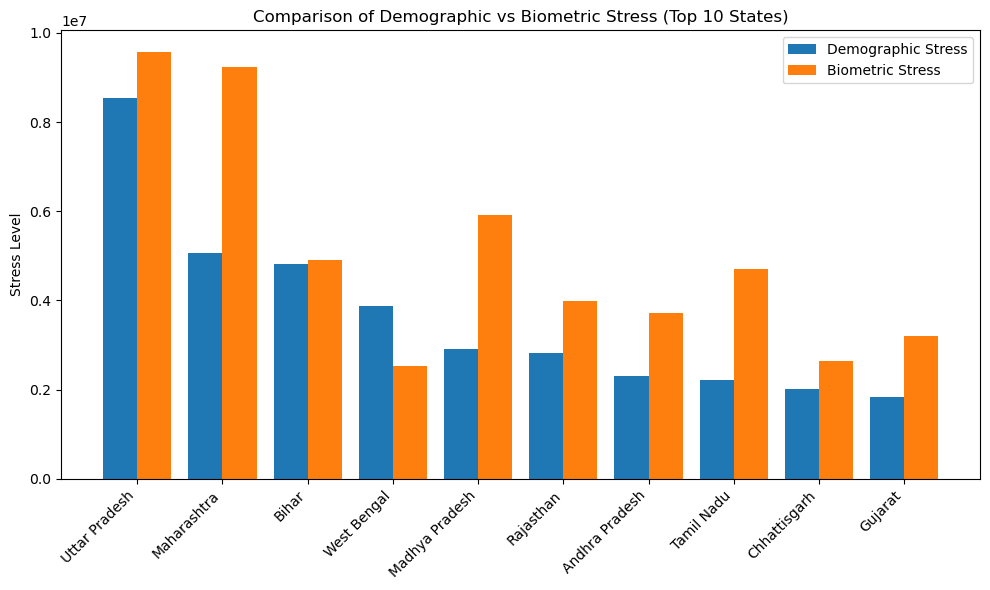

In [33]:
plt.figure(figsize=(10,6))

x = range(len(compare))

plt.bar(x, compare.iloc[:,1], width=0.4, label="Demographic Stress")
plt.bar([i + 0.4 for i in x], compare.iloc[:,2], width=0.4, label="Biometric Stress")

plt.xticks([i + 0.2 for i in x], compare["state"], rotation=45, ha="right")
plt.ylabel("Stress Level")
plt.title("Comparison of Demographic vs Biometric Stress (Top 10 States)")
plt.legend()
plt.tight_layout()
plt.show()


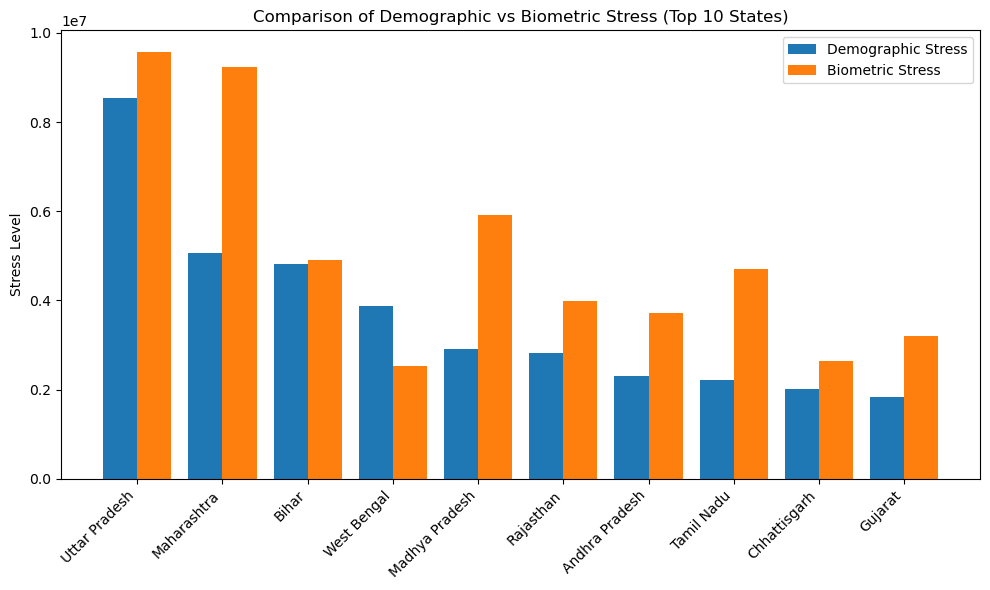

In [34]:
plt.figure(figsize=(10,6))

x = range(len(compare))

plt.bar(x, compare.iloc[:,1], width=0.4, label="Demographic Stress")
plt.bar([i + 0.4 for i in x], compare.iloc[:,2], width=0.4, label="Biometric Stress")

plt.xticks([i + 0.2 for i in x], compare["state"], rotation=45, ha="right")
plt.ylabel("Stress Level")
plt.title("Comparison of Demographic vs Biometric Stress (Top 10 States)")
plt.legend()
plt.tight_layout()

plt.savefig("comparison_demographic_vs_biometric.png", dpi=300)
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# use merged comparison data
x = compare.iloc[:,1]  # demographic stress
y = compare.iloc[:,2]  # biometric stress

x_median = x.median()
y_median = y.median()

plt.figure(figsize=(8,6))
plt.scatter(x, y)

# draw quadrant lines
plt.axvline(x=x_median)
plt.axhline(y=y_median)

for i, state in enumerate(compare["state"]):
    plt.text(x.iloc[i], y.iloc[i], state, fontsize=8)

plt.xlabel("Demographic Stress")
plt.ylabel("Biometric Stress")
plt.title("Aadhaar Stress Quadrant: Governance Risk Classification")
plt.tight_layout()
plt.show()


NameError: name 'compare' is not defined

In [2]:
import pandas as pd

# load both summaries
demo = pd.read_excel("state_demographic_stress.xlsx")
bio = pd.read_excel("state_biometric_stress.xlsx")

# sort and take top 10 demographic stress states
demo_top = demo.sort_values(by=demo.columns[1], ascending=False).head(10)

# merge biometric stress for same states
compare = pd.merge(
    demo_top,
    bio,
    on="state",
    suffixes=("_demo", "_bio")
)

compare


,state,demographic_stress,biometric_stress
0,Uttar Pradesh,8542328,9577735
1,Maharashtra,5054602,9226139
2,Bihar,4814350,4897587
3,West Bengal,3872172,2524448
4,Madhya Pradesh,2912938,5923771
5,Rajasthan,2817615,3994955
6,Andhra Pradesh,2295505,3714592
7,Tamil Nadu,2212228,4698117
8,Chhattisgarh,2005434,2648729
9,Gujarat,1824327,3196514


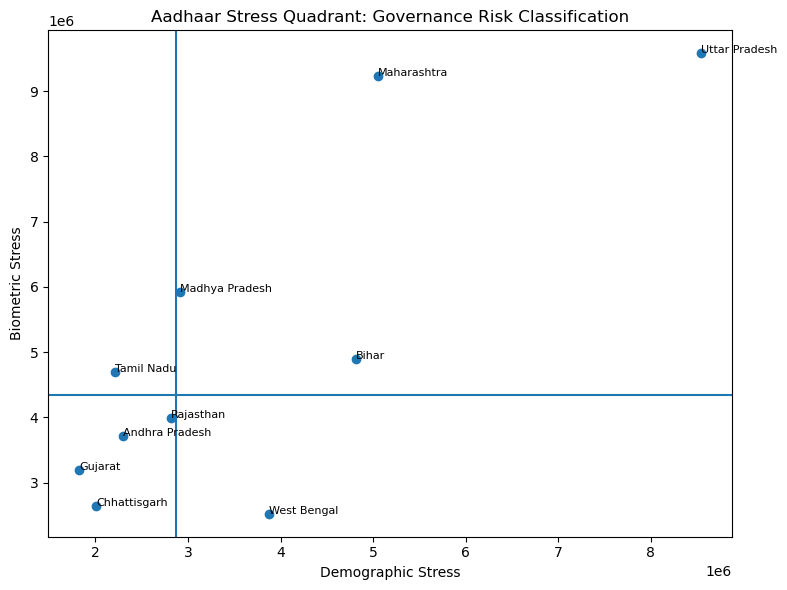

In [3]:
import matplotlib.pyplot as plt

x = compare.iloc[:,1]  # demographic stress
y = compare.iloc[:,2]  # biometric stress

x_median = x.median()
y_median = y.median()

plt.figure(figsize=(8,6))
plt.scatter(x, y)

# quadrant lines
plt.axvline(x=x_median)
plt.axhline(y=y_median)

for i, state in enumerate(compare["state"]):
    plt.text(x.iloc[i], y.iloc[i], state, fontsize=8)

plt.xlabel("Demographic Stress")
plt.ylabel("Biometric Stress")
plt.title("Aadhaar Stress Quadrant: Governance Risk Classification")
plt.tight_layout()
plt.show()


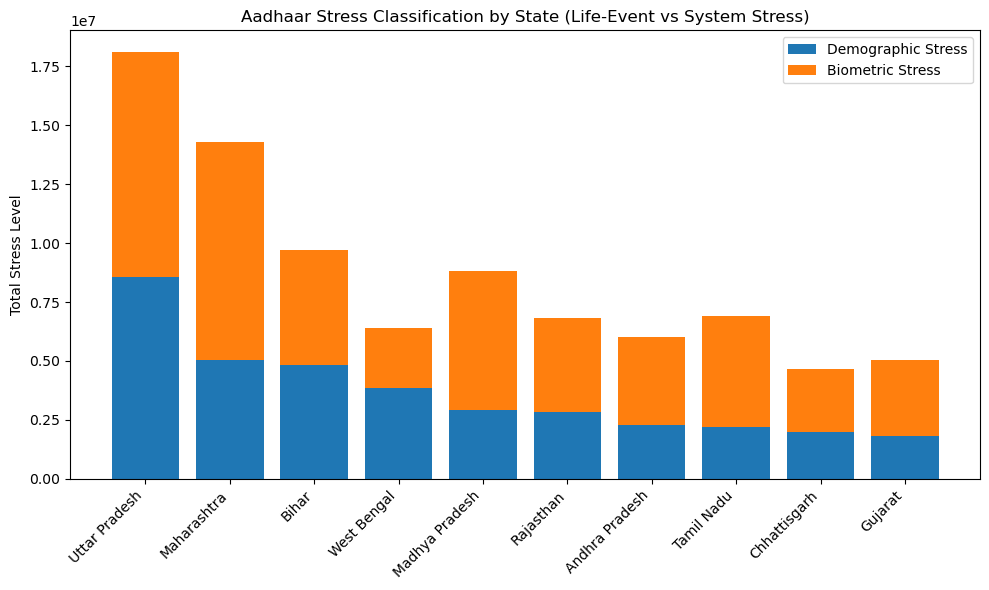

,State,Demographic Stress,Biometric Stress,Category
0,Uttar Pradesh,8542328,9577735,Critical Stress
1,Maharashtra,5054602,9226139,Critical Stress
2,Bihar,4814350,4897587,Critical Stress
3,West Bengal,3872172,2524448,Life-Event Driven
4,Madhya Pradesh,2912938,5923771,Critical Stress
5,Rajasthan,2817615,3994955,Low Stress
6,Andhra Pradesh,2295505,3714592,Low Stress
7,Tamil Nadu,2212228,4698117,System Stress
8,Chhattisgarh,2005434,2648729,Low Stress
9,Gujarat,1824327,3196514,Low Stress


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# assuming compare dataframe already exists
# columns: state, demographic_stress, biometric_stress

compare.columns = ["State", "Demographic Stress", "Biometric Stress"]

# calculate medians
demo_med = compare["Demographic Stress"].median()
bio_med = compare["Biometric Stress"].median()

# classify states
def classify(row):
    if row["Demographic Stress"] >= demo_med and row["Biometric Stress"] >= bio_med:
        return "Critical Stress"
    elif row["Demographic Stress"] < demo_med and row["Biometric Stress"] >= bio_med:
        return "System Stress"
    elif row["Demographic Stress"] >= demo_med and row["Biometric Stress"] < bio_med:
        return "Life-Event Driven"
    else:
        return "Low Stress"

compare["Category"] = compare.apply(classify, axis=1)

# plot grouped bars
plt.figure(figsize=(10,6))
x = range(len(compare))

plt.bar(x, compare["Demographic Stress"], label="Demographic Stress")
plt.bar(x, compare["Biometric Stress"], bottom=compare["Demographic Stress"],
        label="Biometric Stress")

plt.xticks(x, compare["State"], rotation=45, ha="right")
plt.ylabel("Total Stress Level")
plt.title("Aadhaar Stress Classification by State (Life-Event vs System Stress)")
plt.legend()
plt.tight_layout()
plt.show()

compare


In [5]:
# calculate medians
demo_med = compare["Demographic Stress"].median()
bio_med = compare["Biometric Stress"].median()

def classify(row):
    if row["Demographic Stress"] >= demo_med and row["Biometric Stress"] >= bio_med:
        return "Q1: Critical Stress"
    elif row["Demographic Stress"] < demo_med and row["Biometric Stress"] >= bio_med:
        return "Q2: System Stress"
    elif row["Demographic Stress"] < demo_med and row["Biometric Stress"] < bio_med:
        return "Q3: Stable Regions"
    else:
        return "Q4: Life-Event Driven"

compare["Quadrant"] = compare.apply(classify, axis=1)
compare


,State,Demographic Stress,Biometric Stress,Category,Quadrant
0,Uttar Pradesh,8542328,9577735,Critical Stress,Q1: Critical Stress
1,Maharashtra,5054602,9226139,Critical Stress,Q1: Critical Stress
2,Bihar,4814350,4897587,Critical Stress,Q1: Critical Stress
3,West Bengal,3872172,2524448,Life-Event Driven,Q4: Life-Event Driven
4,Madhya Pradesh,2912938,5923771,Critical Stress,Q1: Critical Stress
5,Rajasthan,2817615,3994955,Low Stress,Q3: Stable Regions
6,Andhra Pradesh,2295505,3714592,Low Stress,Q3: Stable Regions
7,Tamil Nadu,2212228,4698117,System Stress,Q2: System Stress
8,Chhattisgarh,2005434,2648729,Low Stress,Q3: Stable Regions
9,Gujarat,1824327,3196514,Low Stress,Q3: Stable Regions


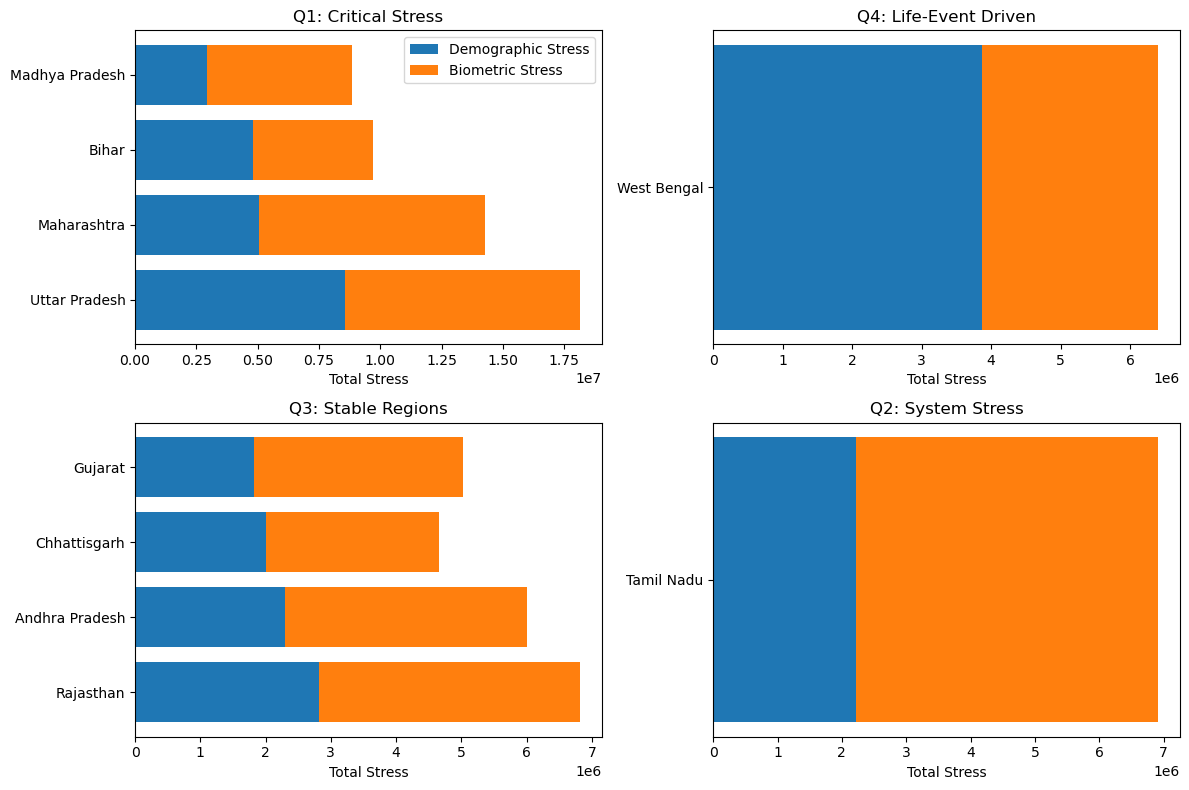

In [6]:
import matplotlib.pyplot as plt

quadrants = compare["Quadrant"].unique()

plt.figure(figsize=(12,8))

for i, q in enumerate(quadrants, 1):
    plt.subplot(2, 2, i)
    data = compare[compare["Quadrant"] == q]

    plt.barh(data["State"], data["Demographic Stress"], label="Demographic Stress")
    plt.barh(
        data["State"],
        data["Biometric Stress"],
        left=data["Demographic Stress"],
        label="Biometric Stress"
    )

    plt.title(q)
    plt.xlabel("Total Stress")

    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()


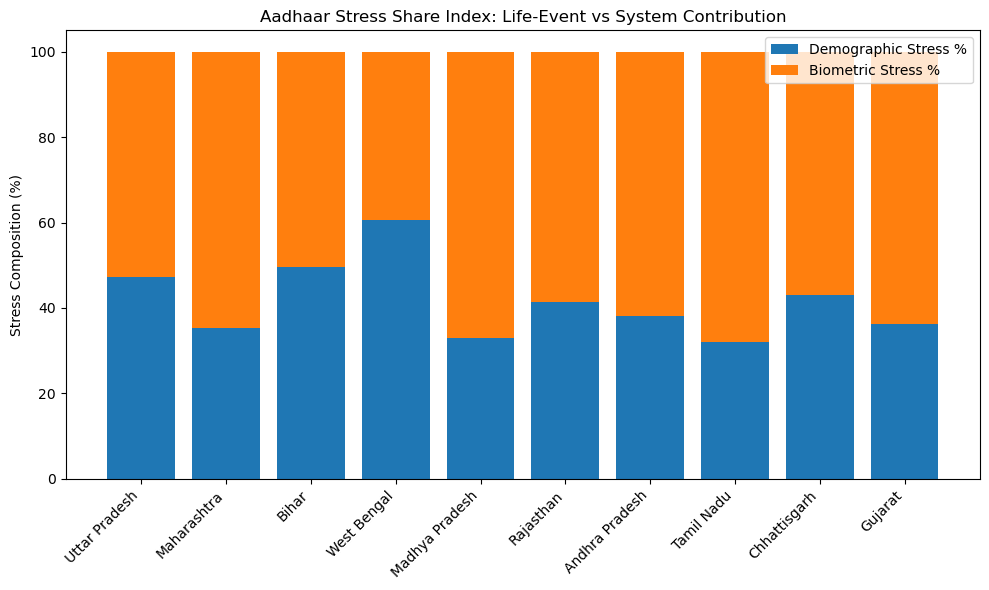

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# use existing compare dataframe
compare_pct = compare.copy()

# total stress
compare_pct["Total Stress"] = (
    compare_pct["Demographic Stress"] + compare_pct["Biometric Stress"]
)

# percentage contribution
compare_pct["Demographic %"] = (
    compare_pct["Demographic Stress"] / compare_pct["Total Stress"] * 100
)
compare_pct["Biometric %"] = (
    compare_pct["Biometric Stress"] / compare_pct["Total Stress"] * 100
)

plt.figure(figsize=(10,6))

plt.bar(
    compare_pct["State"],
    compare_pct["Demographic %"],
    label="Demographic Stress %"
)
plt.bar(
    compare_pct["State"],
    compare_pct["Biometric %"],
    bottom=compare_pct["Demographic %"],
    label="Biometric Stress %"
)

plt.ylabel("Stress Composition (%)")
plt.title("Aadhaar Stress Share Index: Life-Event vs System Contribution")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


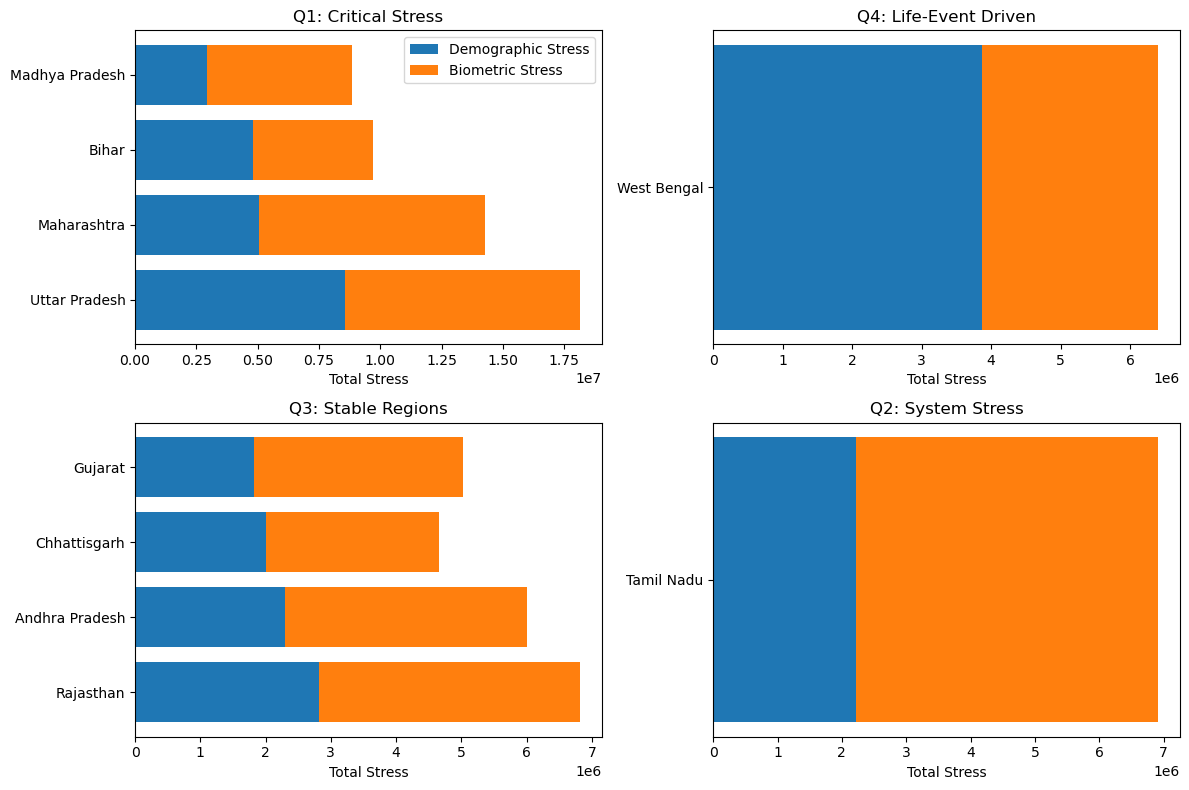

In [8]:
import matplotlib.pyplot as plt

quadrants = compare["Quadrant"].unique()

plt.figure(figsize=(12,8))

for i, q in enumerate(quadrants, 1):
    plt.subplot(2, 2, i)
    data = compare[compare["Quadrant"] == q]

    plt.barh(data["State"], data["Demographic Stress"], label="Demographic Stress")
    plt.barh(
        data["State"],
        data["Biometric Stress"],
        left=data["Demographic Stress"],
        label="Biometric Stress"
    )

    plt.title(q)
    plt.xlabel("Total Stress")

    if i == 1:
        plt.legend()

plt.tight_layout()

# 🔽 SAVE IMAGE HERE
plt.savefig("aadhaar_stress_quadrant_bar.png", dpi=300, bbox_inches="tight")

plt.show()


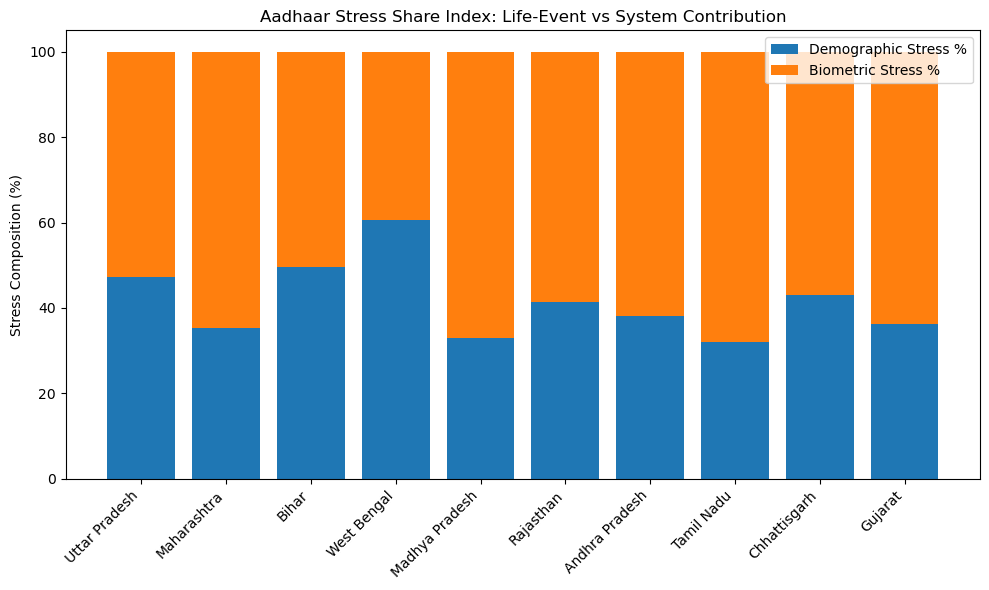

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# use existing compare dataframe
compare_pct = compare.copy()

# total stress
compare_pct["Total Stress"] = (
    compare_pct["Demographic Stress"] + compare_pct["Biometric Stress"]
)

# percentage contribution
compare_pct["Demographic %"] = (
    compare_pct["Demographic Stress"] / compare_pct["Total Stress"] * 100
)
compare_pct["Biometric %"] = (
    compare_pct["Biometric Stress"] / compare_pct["Total Stress"] * 100
)

plt.figure(figsize=(10,6))

plt.bar(
    compare_pct["State"],
    compare_pct["Demographic %"],
    label="Demographic Stress %"
)
plt.bar(
    compare_pct["State"],
    compare_pct["Biometric %"],
    bottom=compare_pct["Demographic %"],
    label="Biometric Stress %"
)

plt.ylabel("Stress Composition (%)")
plt.title("Aadhaar Stress Share Index: Life-Event vs System Contribution")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()

# 🔽 SAVE IMAGE HERE
plt.savefig("aadhaar_stress_share_index.png", dpi=300, bbox_inches="tight")

plt.show()


In [1]:
df.columns


NameError: name 'df' is not defined

In [2]:
import pandas as pd
df = pd.read_csv("../data/demographic_final.csv")


In [3]:
df.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')